<a href="https://colab.research.google.com/github/mlukan/GDA3B2021/blob/main/Martin_Lukan_Quest_Logistic_regression_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below
You will get a passenger list of the titanic.

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/titanic.csv"
df_titanic = pd.read_csv(link)
df_titanic['Survived'] = df_titanic['Survived'].apply(lambda x: "Survived" if x == 1 else "Dead")
df_titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,Dead,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,Survived,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,Dead,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


# Data preparation

What are the "type" of each column? Are there non-numeric columns? 

In [10]:
# What are the "type" of each column? 
df_titanic.dtypes
df_titanic=pd.get_dummies(df_titanic, columns=["Sex"],drop_first=True)
df_titanic.rename(columns={"Sex_male": "Sex"},inplace=True)
df_titanic

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
0,Dead,3,Mr. Owen Harris Braund,22.0,1,0,7.2500,1
1,Survived,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,38.0,1,0,71.2833,0
2,Survived,3,Miss. Laina Heikkinen,26.0,0,0,7.9250,0
3,Survived,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,35.0,1,0,53.1000,0
4,Dead,3,Mr. William Henry Allen,35.0,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
882,Dead,2,Rev. Juozas Montvila,27.0,0,0,13.0000,1
883,Survived,1,Miss. Margaret Edith Graham,19.0,0,0,30.0000,0
884,Dead,3,Miss. Catherine Helen Johnston,7.0,1,2,23.4500,0
885,Survived,1,Mr. Karl Howell Behr,26.0,0,0,30.0000,1


Then, make a first exploration (pairplots, correlation heatmaps, etc...) of the dataset

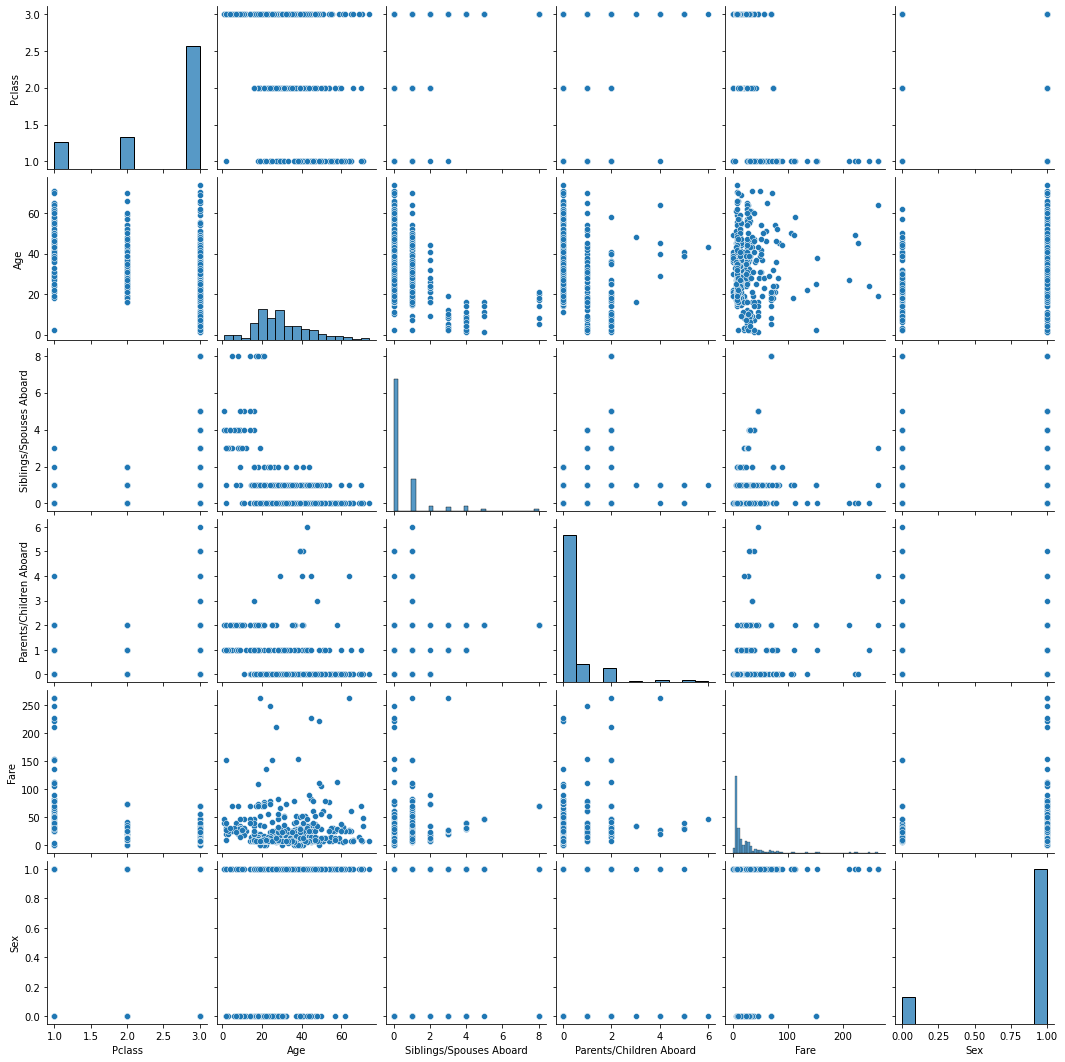

In [11]:
sns.pairplot(df_titanic[df_titanic.Survived.eq('Dead')])

In [12]:

def spearmanrho(df):
  rhovalues = df.corr(method='spearman')
  return rhovalues

spearmanrho(df_titanic)



,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex
Pclass,1.000000,-0.387982,-0.040348,-0.020617,-0.688234,0.133258
Age,-0.387982,1.000000,-0.199269,-0.254234,0.156062,0.081088
Siblings/Spouses Aboard,-0.040348,-0.199269,1.000000,0.449198,0.445980,-0.193354
Parents/Children Aboard,-0.020617,-0.254234,0.449198,1.000000,0.409202,-0.253172
Fare,-0.688234,0.156062,0.445980,0.409202,1.000000,-0.257965
Sex,0.133258,0.081088,-0.193354,-0.253172,-0.257965,1.000000


You are looking for Jack. How many people named Jack on board?

In [13]:
# How many people named Jack on board?
Jacks = df_titanic[df_titanic['Name'].eq('Jack')]
len(Jacks)


0

In [14]:
Jacks

,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex


# Logistic regression

Today, in this quest, you have an extraordinary power: you can travel in time to try to save some passengers. 
You obviously wanted to save Jack. But you didn't find his name on the list. He probably travels under a false name...
Too bad, thanks to this trip, you will still try to save as many people as possible. To do this, you have to identify the people who are most probably going to die. 

- Select features (X) with only numeric values, and without "Survived" column
- Select "Survived" column as target (y)
- Split your data with **random_state = 36**
- Train a logistic regression
- Print the accuracy score on the train set and on the test set. Is there overfitting?
- Print the Confusion Matrix on the test set
- How many iterations were needed to train this model?

In [15]:
# It's up to you:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
X = df_titanic.select_dtypes(exclude='object')
y = df_titanic['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=36)

In [16]:
model = LogisticRegression().fit(X_train,y_train)

In [17]:
print("accuracy score on train set:",model.score(X_train, y_train))

accuracy score on train set: 0.8165413533834587


In [18]:
print("accuracy score on test set:",model.score(X_test, y_test))

accuracy score on test set: 0.7882882882882883


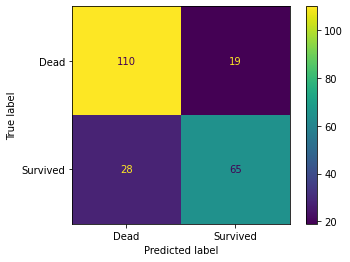

In [19]:
# Print the Confusion Matrix on the test set
predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(values_format = '')

In [20]:
#How many iterations were needed to train this model?
model.n_iter_

array([70], dtype=int32)

# Model improvement

You can save all the people that the model will predict as dead. Change the weight of the classes to save all the people at risk.
- Change the weight of the classes
- Fit the model on train set
- Print the accuracy score on the train set and on the test set
- Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived".

In [25]:
# Change the weight of the classes
#Fit the model on train set

model1 = LogisticRegression(class_weight = {'Dead' : 6})
model1.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight={'Dead': 6}, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy score on train set: 0.7578947368421053
accuracy score on test set: 0.6756756756756757


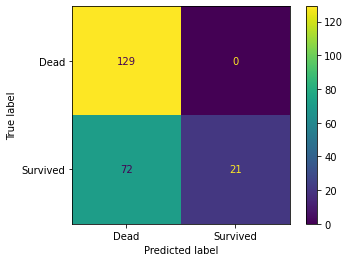

In [26]:
# Print the accuracy score on the train set and on the test set
# Print the Confusion Matrix on the test set, you must have no deaths that have been predicted as "Survived"

print("accuracy score on train set:",model1.score(X_train, y_train))
print("accuracy score on test set:",model1.score(X_test, y_test))
predictions = model1.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(values_format = '')

# People most at risk

You are looking for people most at risk.
- Compute the prediction probabilities **on your test set**
- Which column is about "survived" probability?
- Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
- Display the passengers by sorting  most likely to survive first (`sorted_values()` method?)

In [ ]:
# Compute the prediction probabilities on your test set
model1.predict_proba(X_test)



In [28]:
#Which column is about "survived" probability?
model1.classes_


array(['Dead', 'Survived'], dtype=object)

In [35]:
#Among the previous prediction probability array, select only the column corresponding to the "Survived" probability
predictions=model1.predict_proba(X_test)[:,1]
dfpredtest = X_test.copy()
dfpredtest['pred_survived']=predictions.tolist()
# Display the passengers by sorting most likely to survive first (sorted_values() method?
dfpredtest.sort_values(by='pred_survived',ascending=False)


,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex,pred_survived
883,1,19.0,0,0,30.0000,0,0.871853
777,1,17.0,1,0,57.0000,0,0.833445
534,1,30.0,0,0,106.4250,0,0.818208
217,1,32.0,0,0,76.2917,0,0.798633
755,1,33.0,0,0,86.5000,0,0.793149
...,...,...,...,...,...,...,...
264,3,16.0,4,1,39.6875,1,0.004475
13,3,39.0,1,5,31.2750,1,0.004269
508,3,66.0,0,0,8.0500,1,0.002637
535,3,69.0,0,0,14.5000,1,0.002318


# Bonus - Model improvement, under constraint

Your time travel boss tells you that there's a budget cut. You now can only save 120 people max. Not one more.

If your model predicts as "dead" someone who would have survived in reality. You then "save" that person, who would have survived even without your time-traveling help. And you take the place of someone who could have been saved. That's not optimal.

Select the 120 people with the highest probability of dying. Of these, how many actually survived?

In [38]:
# Select the 120 people with the highest probability of dying. Of these, how many actually survived?
predictions_all = model1.predict_proba(X)[:,1]
df_titanic_out = df_titanic.copy()
df_titanic_out['pred_survived']=predictions_all.tolist()
df_titanic_out.sort_values(by='pred_survived',ascending=False)
pred_dead120 = df_titanic_out.sort_values(by='pred_survived').iloc[:120:,]
len(pred_dead120[pred_dead120.Survived.eq('Survived')])


7

# Bonus - More predictions

Does the Reverend "Rev. Juozas Montvila" have a better chance of survival than "Mrs. William (Margaret Norton) Rice"?
- Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
- Make a prediction with probability for this 2 people
- Which one has a better chance to survive?


In [39]:
#Filter the initial DataFrame to get only the 2 rows with the 2 persons above, and only columns present in your variables (X)
montvila_vs_rice = df_titanic_out[df_titanic_out.Name.isin(['Rev. Juozas Montvila','Mrs. William (Margaret Norton) Rice'])]
montvila_vs_rice


,Survived,Pclass,Name,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,Sex,pred_survived
881,Dead,3,Mrs. William (Margaret Norton) Rice,39.0,0,5,29.125,0,0.105971
882,Dead,2,Rev. Juozas Montvila,27.0,0,0,13.000,1,0.059846




```
Make a prediction with probability for this 2 people?
Column pred_survived

Which one has a better chance to survive?
Mrs. William (Margaret Norton) Rice
```

